In [53]:
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from collections import deque
from time import time


In [54]:
test1 = [[0, 292, 399, 307]]
test2 = [[48, 192, 351, 207],
        [48, 392, 351, 407],
        [120, 52, 135, 547],
        [260, 52, 275, 547]]


In [58]:

class BarrenLandBFS:
    def __init__(self, coord_arr: list, x_max=400, y_max=600):
        """
        Take a list of coordinates. Each coordinate is a rectangle
        The first two integers are the coordinates of the bottom 
        left corner in the given rectangle, and the last two 
        integers are the coordinates of the top right corner.
        
        ymax is the height of the field in meters
        xmax is the height of the field in meters
        """
        self.x_max = x_max
        self.y_max = y_max
        # Ceate an empty field
        self.land = np.zeros((y_max, x_max))
        # Parse coordinates
        self.coord_list = self.build_coord_list(coord_arr)
        # Fill the field with the barren locations
        self.populate_barren_land()
        

    def find_fertile_areas(self) -> list:
        """
        Starts at 0,0 and goes row by row until it has 
        found fertile land then BFS starts. It will continue
        until every spot has been searched return the results
        """
        x, y = 0, 0
        results = []

        while x < self.x_max and y < self.y_max:
            # Once fertile spot is found start BFS
            if self.land[y][x] == 0:
                # add the land size found from bfs to the results
                results.append(self.bfs(x, y))
            # go row by row looking for a fertile spot
            if x == self.x_max - 1:
                x = 0
                y += 1
            else:
                x += 1
        # Displayed from smallest to largest
        return sorted(results)

    def bfs(self, x: int, y: int) -> int:
        # queue to hold neighbor spaces
        queue = deque()
        # starting node, stored as a tuple (x,y)
        queue.append((x, y))
        # tracks the size of the fertile land
        land_size = 0         

        # while we have a queue
        while queue:
            # Take the most recent queue
            node = queue.pop()
            # Assign the x and y value
            x, y = node
            # if the land is fertile
            if self.land[y][x] == 0:
    
                land_size += 1
                # Mark that the land was visted
                self.land[y][x] = 1

                # Add neighbors to the queue if they're in boundaries
                # and the the land is fertile
                if x > 0 and self.land[y][x-1] == 0:
                    queue.append((x-1, y))
                if x < self.x_max - 1 and self.land[y][x+1] == 0:
                    queue.append((x+1, y))
                if y > 0 and self.land[y-1][x] == 0:
                    queue.append((x, y-1))
                if y < self.y_max - 1 and self.land[y+1][x] == 0:
                    queue.append((x, y+1))
        # Once all the land has been visted return the size
        return land_size

    def populate_barren_land(self): 
        for coords in self.coord_list:
            for y in range(coords["y0"], coords["y1"]+1):
                for x in range(coords["x0"], coords["x1"]+1):
                    # Mark as barren
                    self.land[y][x] = -1
        
    
    def display_land(self):
        # Set the colors for the visualization
        cmap = colors.ListedColormap(['black','green'], 
                                     name='colors', N=None)
        plt.imshow(self.land, cmap=cmap)
        plt.ion()
        plt.draw()
        plt.pause(4.0)
        plt.show()

    @staticmethod
    def build_coord_list(raw_coord_list: list) -> list:
        coord_list = []
        for coords in raw_coord_list:
            coord_list.append(
                {
                    "x0": int(coords[0]),
                    "y0": int(coords[1]),
                    "x1": int(coords[2]),
                    "y1": int(coords[3])
                }
            )
        return coord_list


Process Time (ms): 839.671134948730469
[116800, 116800]


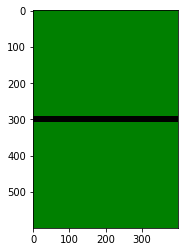

In [56]:
start = time()
bfs = BarrenLandBFS(test1,400, 600)
result = bfs.find_fertile_areas()
end = time()
print("\nProcess Time (ms): {0:.15f}".format((end - start)*1000))
print(result)
bfs.display_land()


Process Time (ms): 832.480907440185547
[22816, 192608]


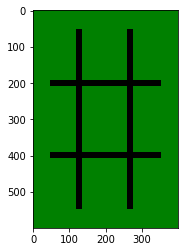

In [57]:
start = time()
bfs = BarrenLandBFS(test2,400, 600)
result = bfs.find_fertile_areas()
end = time()
print("\nProcess Time (ms): {0:.15f}".format((end - start)*1000))
print(result)
bfs.display_land()